In [24]:
import comet_ml
import matplotlib.pyplot as plt
import numpy as np

In [4]:
api = comet_ml.api.API(api_key='z4s7SHtPPZqFaWHM7JWMD9zqS')

In [71]:
def get_exp(name):
    return api.get_experiment('', 'harmon-moyer', name)

In [59]:
def get_metric(exp, name, target_type=float):
    return [target_type(x['metricValue']) for x in exp.get_metrics(name)]

In [60]:
def get_params(exp):
    return {x['name']: x['valueCurrent'] for x in exp.get_parameters_summary()}

In [92]:
def make_plot(exp):
    param_dict = get_params(exp)
    
    legend_labels = ['recon', 'adv', 'prior', 'marg']
    
    plt.figure(figsize=(14, 5))
    plt.suptitle(exp.name)

    plt.subplot(1, 4, 1)
    plt.title('Loss weights')
    plt.pie([
        float(param_dict['loss_weight_recon']),
        float(param_dict['loss_weight_adv_g']),
        float(param_dict['loss_weight_prior']),
        float(param_dict['loss_weight_marg']),
    ], labels=legend_labels)


    plt.subplot(1, 4, 2)
    plt.title('Mean loss values')
    plt.pie([
        np.mean(get_metric(exp, 'train_loss_recon')),
        np.mean(get_metric(exp, 'train_loss_adv_g')),
        np.mean(get_metric(exp, 'train_loss_prior')),
        np.mean(get_metric(exp, 'train_loss_marg')),
    ], labels=legend_labels)

    plt.subplot(1, 4, 3)
    plt.title('Mean encoder update norm')
    plt.pie([
        np.mean(get_metric(exp, 'dlrecon_dwenc')),
        np.mean(get_metric(exp, 'dladv_dwenc')),
        np.mean(get_metric(exp, 'dlprior_dwenc')),
        np.mean(get_metric(exp, 'dlmarg_dwenc')),
    ], labels=legend_labels)
    
    plt.subplot(1, 4, 4)
    plt.title('Mean decoder update norm')
    plt.pie([
        np.mean(get_metric(exp, 'dlrecon_dwdec')),
        np.mean(get_metric(exp, 'dladv_dwdec'))
    ], labels=['recon', 'adv'])

    plt.show()

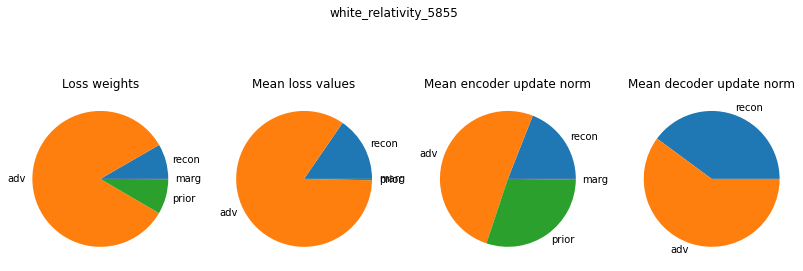

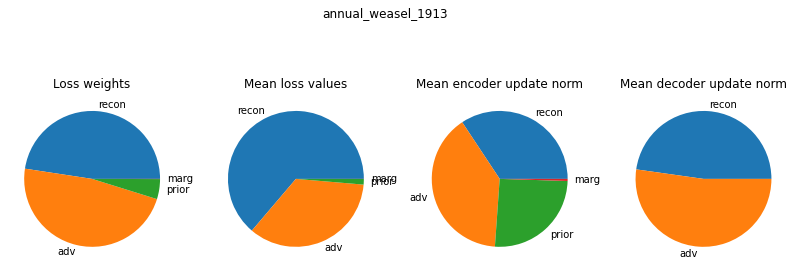

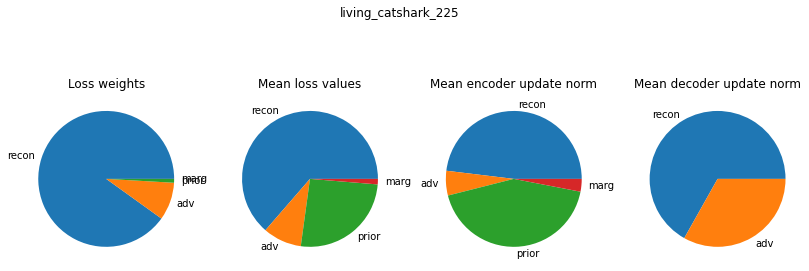

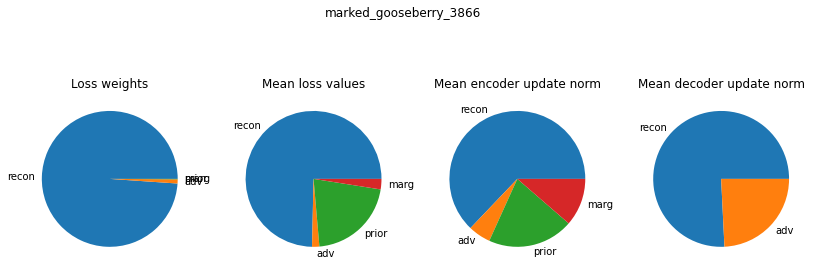

In [93]:
make_plot(get_exp('8ef2282f72e54ff382f1c4c181b5548a'))

make_plot(get_exp('9fe74778668c49169ffbd1e13a8832b2'))

make_plot(get_exp('81506ab5ce6a463f8d080f96905a2487'))

make_plot(get_exp('7133a633b36f4c6ba08c551f04e65f9c'))